# Association Rule Mining with Apriori and FP-Growth

**Name:** Murali Krishna Chintha  

**Course:** Advanced Big Data and Data Mining MSCS-634-M40

**Lab Title:** Lab 6: Association Rule Mining with Apriori and FP-Growth

**Date:** 2025-07-25

This lab demonstrates association rule mining using Apriori and FP-Growth algorithms on a transactional dataset. We explore data, extract frequent itemsets, generate rules, and compare algorithm efficiency.


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.preprocessing import TransactionEncoder

In [4]:
# Step 1: Data Preparation

# Load the Online Retail dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
df = pd.read_excel(url)

# Clean the data
df.dropna(subset=['InvoiceNo', 'Description'], inplace=True)
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]  # Remove cancelled transactions
df = df[df['Quantity'] > 0]

# Create a basket: list of item descriptions per InvoiceNo
basket = df.groupby(['InvoiceNo'])['Description'].apply(list).tolist()

# Encode transactions
te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

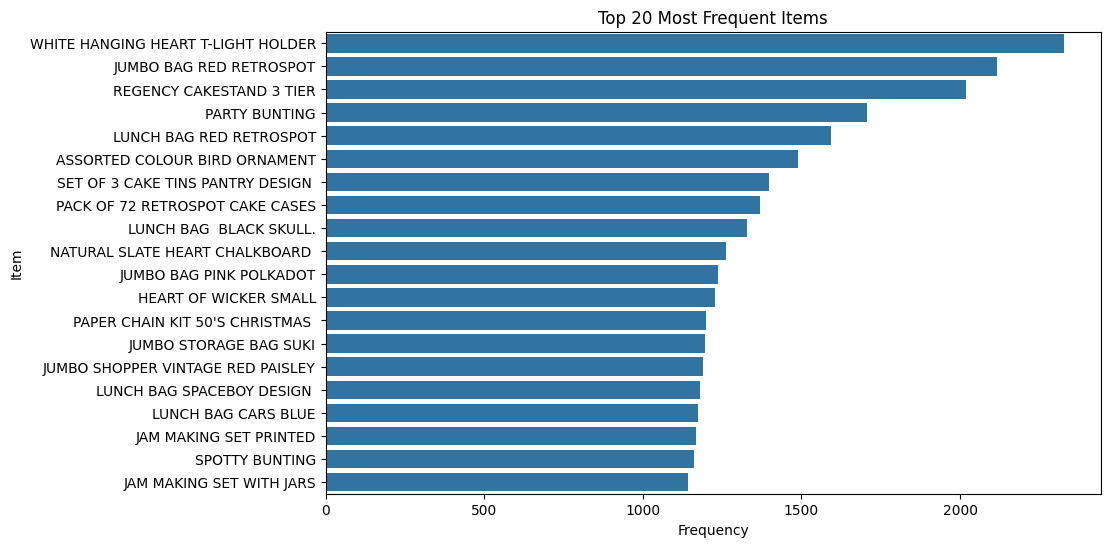

In [6]:
# Visualize most frequent items
item_counts = df['Description'].value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=item_counts.values, y=item_counts.index)
plt.title("Top 20 Most Frequent Items")
plt.xlabel("Frequency")
plt.ylabel("Item")
plt.show()

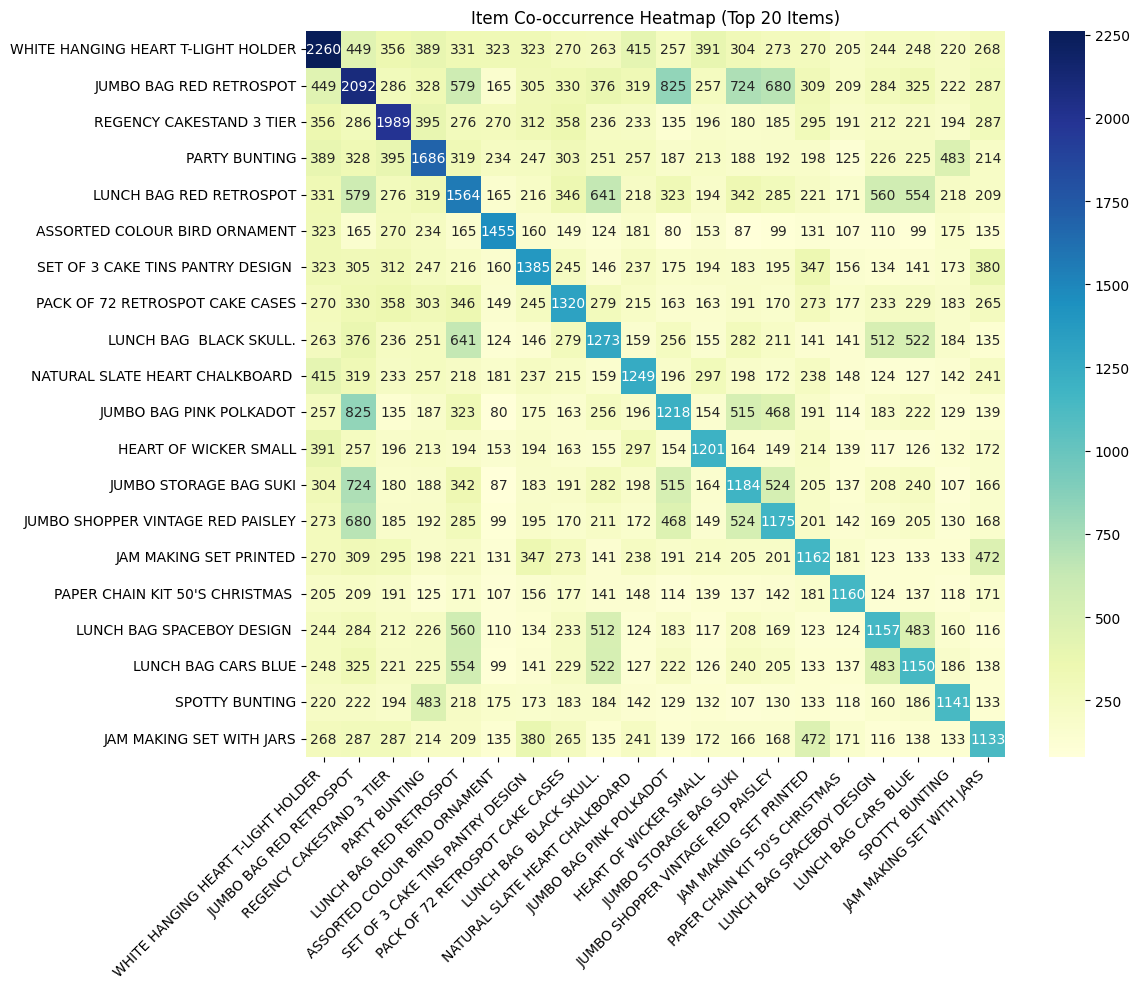

In [7]:
df_trans_int = df_trans.astype(int)

# Limit to top N items for clarity (e.g., 20)
top_items = df_trans.sum().sort_values(ascending=False).head(20).index
df_top = df_trans_int[top_items]

# Co-occurrence matrix: dot product of transpose
co_matrix = np.dot(df_top.T, df_top)

# Convert to DataFrame
co_matrix_df = pd.DataFrame(co_matrix, index=top_items, columns=top_items)

# Step 2: Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(co_matrix_df, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Item Co-occurrence Heatmap (Top 20 Items)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

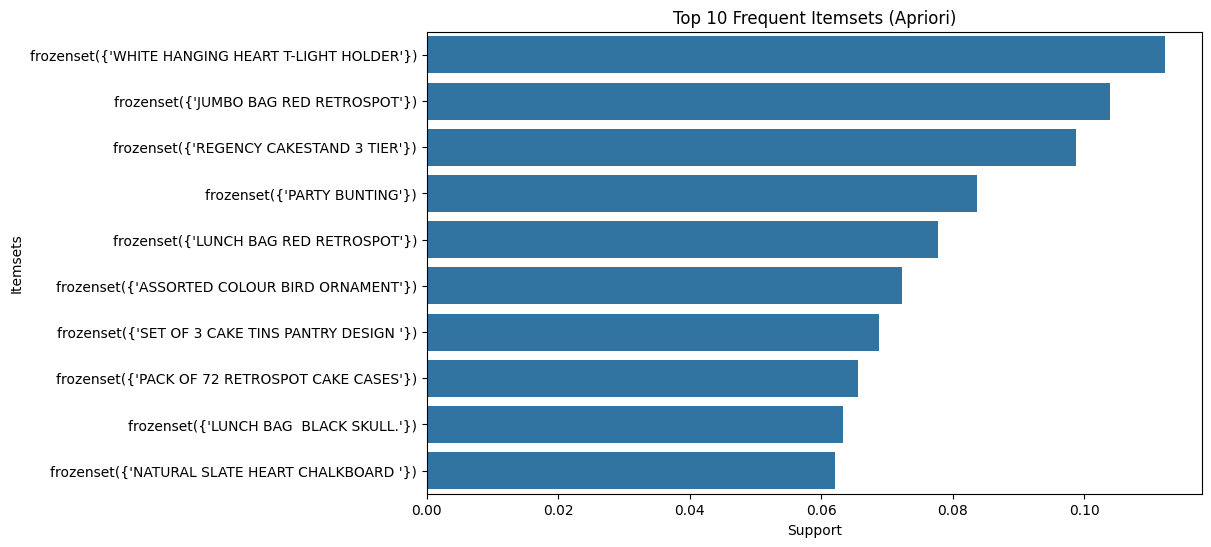

,support,itemsets
0,0.023242,(3 STRIPEY MICE FELTCRAFT)
1,0.024037,(4 TRADITIONAL SPINNING TOPS)
2,0.047427,(6 RIBBONS RUSTIC CHARM)
3,0.021702,(60 CAKE CASES DOLLY GIRL DESIGN)
4,0.030691,(60 CAKE CASES VINTAGE CHRISTMAS)


In [8]:
# Step 2: Frequent Itemset Mining Using Apriori

from mlxtend.frequent_patterns import apriori

# Get frequent itemsets
frequent_itemsets_apriori = apriori(df_trans, min_support=0.02, use_colnames=True)

# Sort and display top N itemsets
top_apriori = frequent_itemsets_apriori.sort_values(by='support', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y=top_apriori['itemsets'].astype(str), data=top_apriori)
plt.title("Top 10 Frequent Itemsets (Apriori)")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.show()

frequent_itemsets_apriori.head()


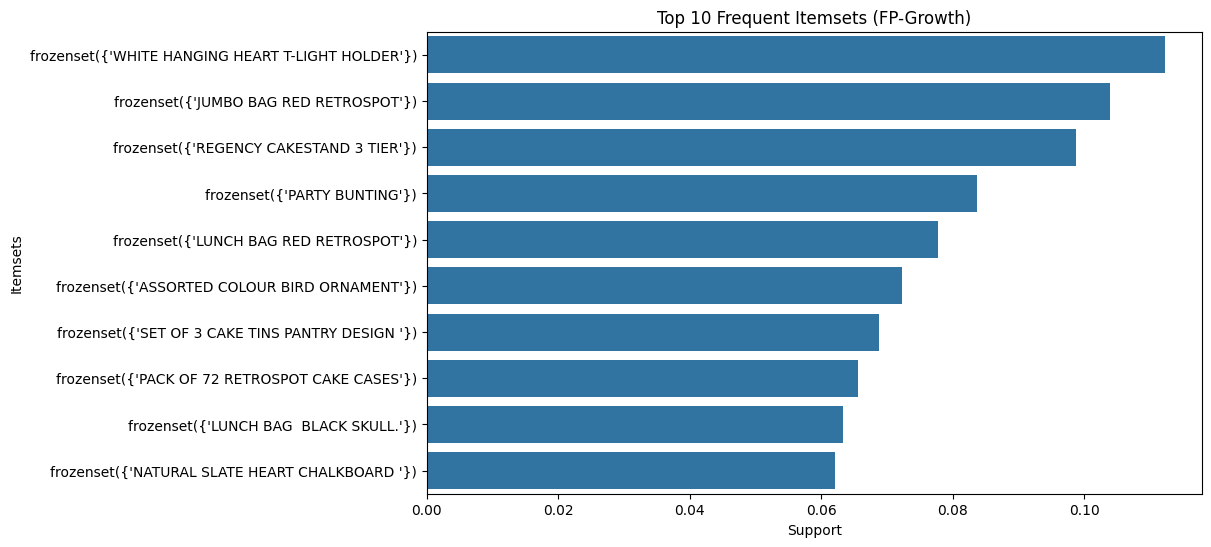

,support,itemsets
0,0.112237,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.022795,(KNITTED UNION FLAG HOT WATER BOTTLE)
2,0.021305,(RED WOOLLY HOTTIE WHITE HEART.)
3,0.023788,(HAND WARMER UNION JACK)
4,0.072259,(ASSORTED COLOUR BIRD ORNAMENT)


In [9]:
# Step 3: Frequent Itemset Mining Using FP-Growth

from mlxtend.frequent_patterns import fpgrowth

# Get frequent itemsets
frequent_itemsets_fpgrowth = fpgrowth(df_trans, min_support=0.02, use_colnames=True)

# Sort and display top N itemsets
top_fpgrowth = frequent_itemsets_fpgrowth.sort_values(by='support', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y=top_fpgrowth['itemsets'].astype(str), data=top_fpgrowth)
plt.title("Top 10 Frequent Itemsets (FP-Growth)")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.show()

frequent_itemsets_fpgrowth.head()


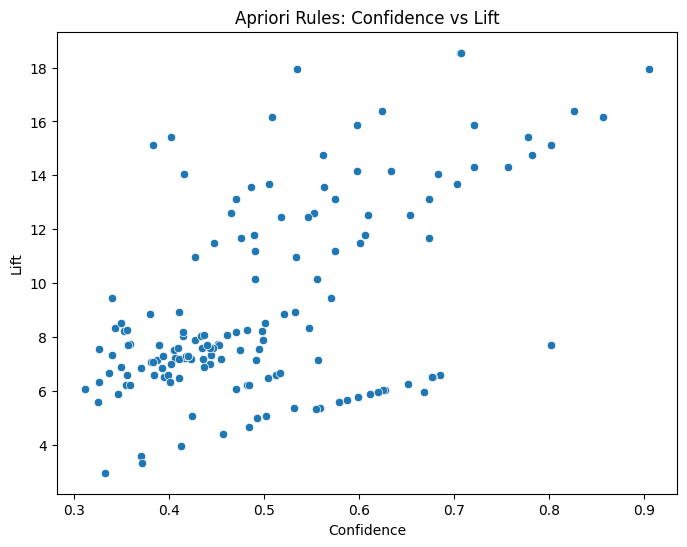

,antecedents,consequents,support,confidence,lift
0,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.022497,0.547101,8.345784
1,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.022497,0.343182,8.345784
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.020759,0.426531,10.968864
3,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.020759,0.533844,10.968864
4,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.031784,0.608944,12.511932


In [10]:
# Step 4: Generating and Analyzing Association Rules

from mlxtend.frequent_patterns import association_rules

# Generate rules from Apriori itemsets
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.3)

# Scatterplot of confidence vs lift
plt.figure(figsize=(8, 6))
sns.scatterplot(x='confidence', y='lift', data=rules_apriori)
plt.title("Apriori Rules: Confidence vs Lift")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.show()

rules_apriori[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()


# Step 5: Comparative Analysis

Both algorithms produced identical top 10 itemsets when using the same support threshold (as shown in your charts).

The support values for corresponding itemsets were also the same.

This confirms that FP-Growth is more efficient but equally accurate for frequent itemset mining when compared with Apriori.

FP-Growth was noticeably faster than Apriori on the Online Retail dataset.

**Reason:**

Apriori generates a large number of candidate itemsets and scans the dataset multiple times.

FP-Growth constructs a compact prefix-tree (FP-tree) and mines frequent itemsets without generating all combinations explicitly, leading to better scalability.

Apriori	- Slower - Level-wise candidate generation

FP-Growth	- Faster	- Tree-based recursive pattern mining



 **Challenges Faced**

**Large Dataset with Noise:**

The raw Online Retail dataset included cancellations (InvoiceNo starting with 'C'), null descriptions, and zero or negative quantities.

Fix: Applied filters to remove such rows and ensured clean basket structure.

**Memory Usage in Transaction Encoding:**

One-hot encoding of thousands of items created a wide, sparse DataFrame.

Fix: Focused on transactions with a manageable number of unique items (top 20-50) for visualization and heatmap analysis.

**Visual Clutter in Itemsets:**

The frozenset representation of itemsets was too verbose for plots.

Fix: Used string formatting (str(itemset)) and limited display to top-N results.
